## A very basic anlysis is COVID-19 cases in South Koea. 

Data was downloaded from Kaggle and a preliminary analyis conducted to discover facts. 

There are two aspects to the analysis
* Total number of tests and how many tested postive
* Among the patients, how many died and any further information about duration, gender, possible underlying conditions etc.

Further steps could include machine learning to determine probability but the number od positive cases may be too low in this case for a good training set.

### Key findings were:
* All patients with underlying condition have died
* Daegu is the reagion with most casualties relative to confirmed cases
* Second group at risk are older than 60

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# read the csv file with patient information (tested positive)
df = pd.read_csv('patient.csv')
# get the total number of rows and culumns
print("The number of rows and columns", df.shape)

The number of rows and columns (7869, 15)


In [2]:
# first look at the dataset
df.head(10)

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
6,7,male,1991.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released


In [3]:
# get column names for further analysis
df.columns

Index(['patient_id', 'sex', 'birth_year', 'country', 'region', 'disease',
       'group', 'infection_reason', 'infection_order', 'infected_by',
       'contact_number', 'confirmed_date', 'released_date', 'deceased_date',
       'state'],
      dtype='object')

* patient_id: the ID of the patient (n-th confirmed patient)
* sex: the sex of the patient
* birth_year: the birth year of the patient
* country: the country of the patient
* region: the region of the patient
* disease 0: no disease / 1: underlying disease
* group: the collective infection
* infection_reason: the reason of infection
* infection_order: the order of infection
* infected_by: the ID of who has infected the patient
* contact_number: the number of contacts with people
* confirmed_date: the date of confirmation
* released_date: the date of discharge
* deceased_date: the date of decease
* state: isolated / released / deceased

In [4]:
# descriptive statistics
df.describe()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
count,7869.000000,666.000000,28.0,36.000000,70.000000,53.000000
mean,3935.000000,1974.271772,1.0,4.277778,379.000000,67.849057
std,2271.728967,17.423250,0.0,12.032364,540.247528,177.723575
min,1.000000,1929.000000,1.0,1.000000,3.000000,0.000000
25%,1968.000000,1962.000000,1.0,1.000000,29.250000,3.000000
50%,3935.000000,1974.000000,1.0,2.000000,126.000000,17.000000
75%,5902.000000,1990.000000,1.0,3.000000,563.250000,45.000000
max,7869.000000,2018.000000,1.0,74.000000,2621.000000,1160.000000


## Initial glance

We now know the columns and the ones I will be focusing are the dates and state.

* Out of 7869 patients, only 666 appear to have birth year, not good enough for analyis
* The youngest patient is born in 2018 and oldest 1929
* 50% of patients are over 46, 75% over 58 - older people are definitely more impacted
* 2621 out of 7869 or about a third are infected by other patients
* Most patients had limited contact with others who needed to be tested
* Patient id could provide links and we can check which patient infected others

We start with columns which are not numeric: gender, country, region and state


In [5]:
# look at other columns: demographic
print(df.sex.value_counts())
print('---------------------------')
print(df.country.value_counts())
print('---------------------------')
print(df.region.value_counts())

female    393
male      286
Name: sex, dtype: int64
---------------------------
Korea       7860
China          8
Mongolia       1
Name: country, dtype: int64
---------------------------
capital area           191
Gyeongsangbuk-do       140
Daegu                   57
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeju-do                  4
Jeollanam-do             3
Jeollabuk-do             3
Ulsan                    2
Chungcheongbuk-do        2
Busan                    1
Chungcheongnam-do        1
Name: region, dtype: int64


In [6]:
# infection reasons/group
print(df.infection_reason.value_counts())
print('---------------------------')
print(df.group.value_counts())
print('---------------------------')
print(df.disease.value_counts())

contact with patient                 76
visit to Daegu                       50
visit to Wuhan                        8
pilgrimage to Israel                  6
visit to Thailand                     2
contact with patient in Singapore     2
visit to China                        2
residence in Wuhan                    2
visit to ooo                          1
visit to Italy                        1
contact with patient in Japan         1
visit to Japan                        1
visit to Vietnam                      1
contact with patient in Daegu         1
Name: infection_reason, dtype: int64
---------------------------
Shincheonji Church               58
Eunpyeong St. Mary's Hospital    13
Cheongdo Daenam Hospital          9
Pilgrimage                        6
Name: group, dtype: int64
---------------------------
1.0    28
Name: disease, dtype: int64


## Initial analysis 2

Most patients have state and country identified but not gender or region.

* Most patients are in the capital area which makes sense
* More cases list contact with patient or visit abroad
* Shincheonji Church appears to be the largest group
* Among identified gender, there are more female patients.
* 28 patients have underlying conditions

Each of the groups can be analyzed but focus on those who died because of the infection


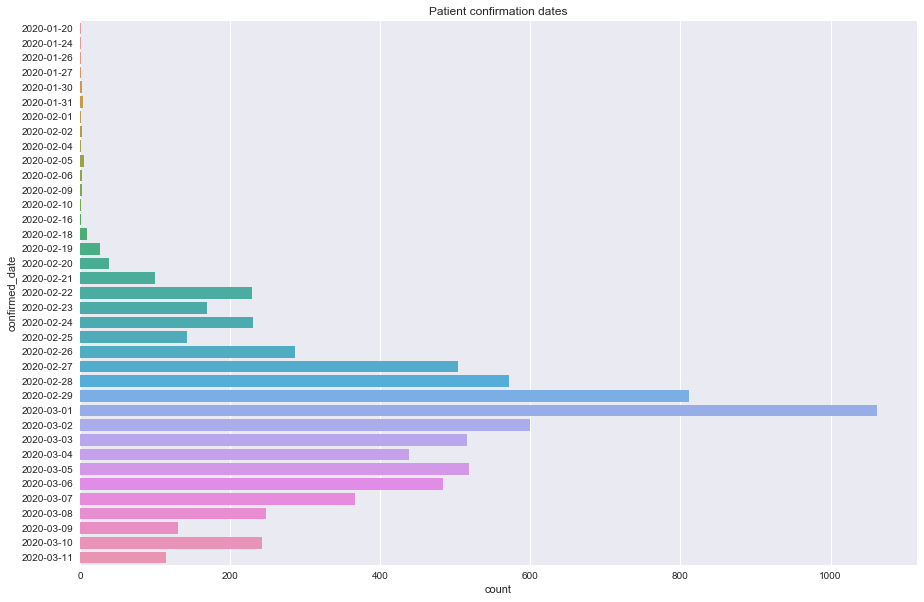

In [7]:
# plot date of confirmation
fig = plt.figure(figsize=(15,10))

fig = sns.countplot(y="confirmed_date", data=df)
fig.set_title("Patient confirmation dates")

In [8]:
# patient state as of 15 March 2020
print(df.state.value_counts())

isolated    7777
released      56
deceased      36
Name: state, dtype: int64


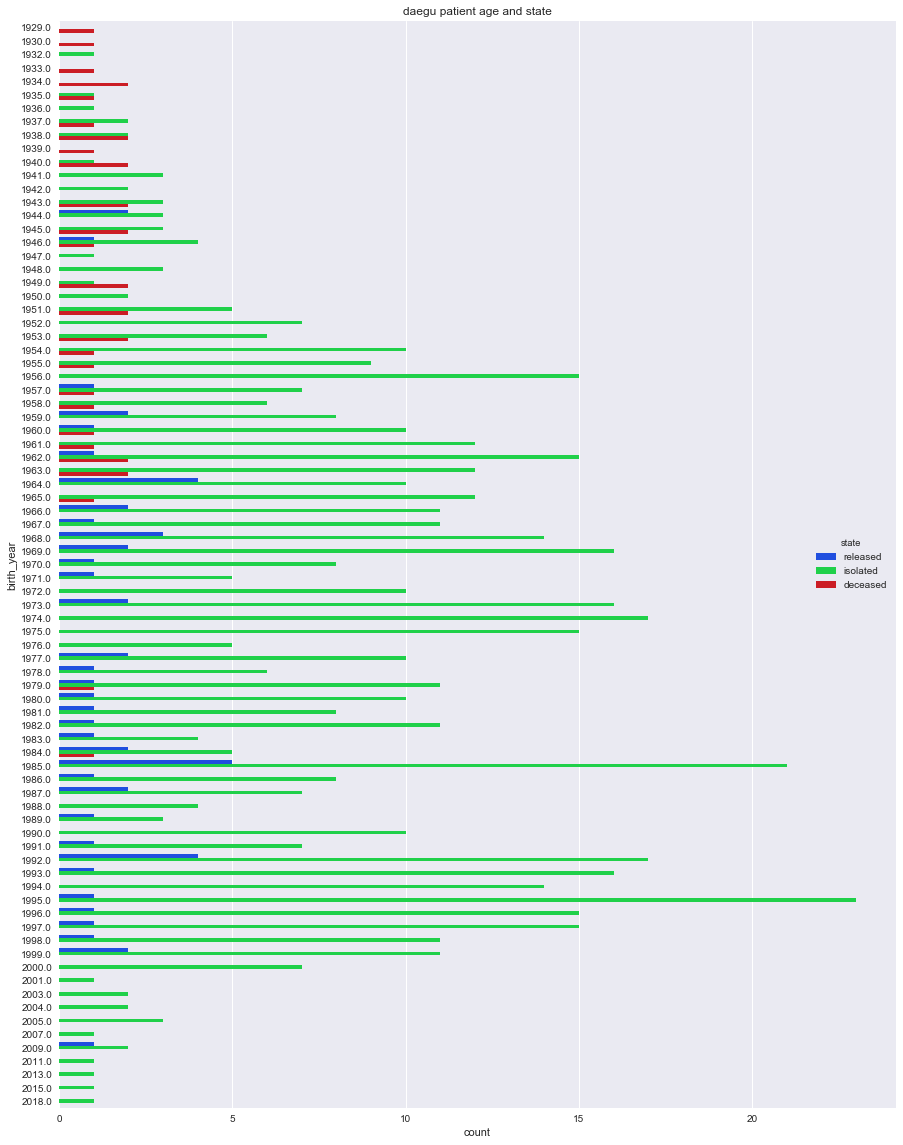

In [9]:
# plot other factors
fig = plt.figure(figsize=(15,20))

fig = sns.countplot(y='birth_year', data=df, hue="state", palette="bright")
fig.set_title("daegu patient age and state")
plt.show()

### Most patients are young; older ones who have tested positive have died

In [10]:
# Look at only the deceased
deceased = df[df['state'] == "deceased"]
deceased.describe()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
count,36.000000,36.000000,28.0,0.0,0.0,0.0
mean,2250.194444,1949.388889,1.0,NaN,NaN,NaN
std,2107.192009,13.137249,0.0,NaN,NaN,NaN
min,38.000000,1929.000000,1.0,NaN,NaN,NaN
25%,367.750000,1938.750000,1.0,NaN,NaN,NaN
50%,1682.000000,1949.000000,1.0,NaN,NaN,NaN
75%,3657.500000,1958.500000,1.0,NaN,NaN,NaN
max,7196.000000,1984.000000,1.0,NaN,NaN,NaN


Overall out of 7869 patients, 36 died (very small number). Infection order, by and contacts are missing though...this might change in the future

In [11]:
# number of patients by birth year
deceased.sort_values(by=['birth_year'])

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
6284,6285,female,1929.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,2020-03-04,deceased
3577,3578,male,1930.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-07,deceased
3895,3896,male,1933.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-03,deceased
2768,2769,female,1934.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-02,deceased
900,901,female,1934.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-03-04,deceased
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
390,391,male,1937.0,Korea,Gyeongsangbuk-do,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-03-05,deceased
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
3913,3914,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-09,deceased
2935,2936,male,1939.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-06,deceased


In [12]:
# look at other columns: demographic
print(deceased.sex.value_counts())
print('---------------------------')
print(deceased.country.value_counts())
print('---------------------------')
print(deceased.region.value_counts())
print('---------------------------')
print(deceased.infection_reason.value_counts())
print('---------------------------')
print(deceased.group.value_counts())
print('---------------------------')
print(deceased.disease.value_counts())

male      25
female    11
Name: sex, dtype: int64
---------------------------
Korea       35
Mongolia     1
Name: country, dtype: int64
---------------------------
Daegu               20
Gyeongsangbuk-do    15
capital area         1
Name: region, dtype: int64
---------------------------
contact with patient    1
Name: infection_reason, dtype: int64
---------------------------
Cheongdo Daenam Hospital    7
Shincheonji Church          2
Name: group, dtype: int64
---------------------------
1.0    28
Name: disease, dtype: int64


## Some comparisons

* All patients with underlying condition have succumbed
* Those who do not have underlying condition registered are old (only two younger than 70)
* More male than female patients 
* What stands out is that most patients have underlying health condition
* Out of 57 patients in Daegu, there are 20 deaths
* Gyeongsangbuk-do is second with 15 casualties among 140 patients
* Only 1 casualty in capital area tough it has most cases (191)

### Look at birth year of patients as that was a finding earlier. Second look at Daegu data

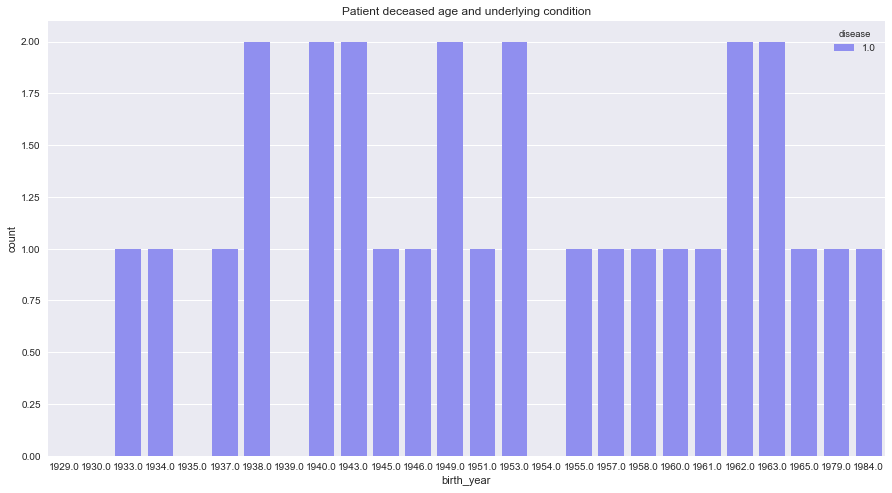

In [13]:
# plot other factors
fig = plt.figure(figsize=(15,8))

fig = sns.countplot(x='birth_year', data=deceased, hue="disease", palette="cool")
fig.set_title("Patient deceased age and underlying condition")
plt.show()

In [14]:
# Look at only the deceased
daegu = df[df['region'] == "Daegu"]
daegu.describe()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
count,57.000000,57.000000,14.0,0.0,8.0,1.0
mean,1018.263158,1964.017544,1.0,NaN,31.0,1160.0
std,1605.579240,19.831875,0.0,NaN,0.0,NaN
min,31.000000,1930.000000,1.0,NaN,31.0,1160.0
25%,50.000000,1949.000000,1.0,NaN,31.0,1160.0
50%,88.000000,1961.000000,1.0,NaN,31.0,1160.0
75%,1288.000000,1982.000000,1.0,NaN,31.0,1160.0
max,7196.000000,1999.000000,1.0,NaN,31.0,1160.0


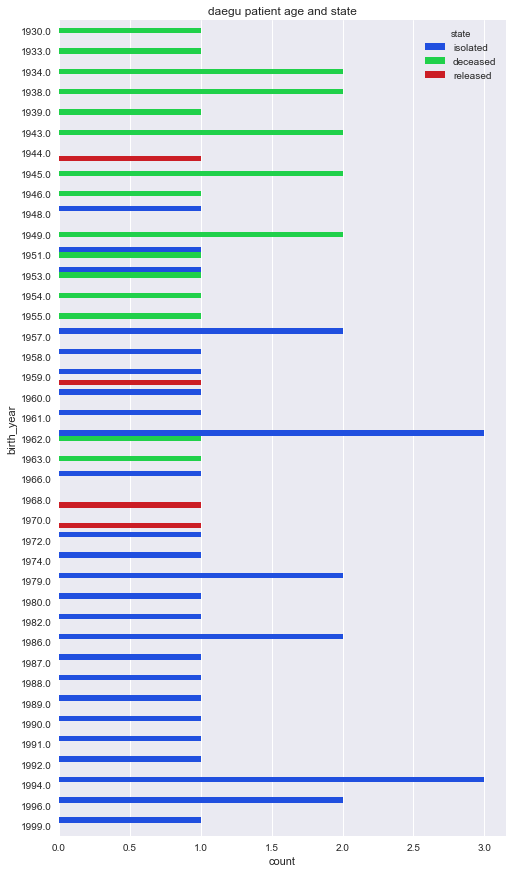

In [15]:
# plot other factors
fig = plt.figure(figsize=(8,15))

fig = sns.countplot(y='birth_year', data=daegu, hue="state", palette="bright")
fig.set_title("daegu patient age and state")
plt.show()

In [16]:
# look at other columns: demographic
print(daegu.sex.value_counts())
print('---------------------------')
print(daegu.country.value_counts())
print('---------------------------')
print(daegu.region.value_counts())
print('---------------------------')
print(daegu.infection_reason.value_counts())
print('---------------------------')
print(daegu.group.value_counts())
print('---------------------------')
print(daegu.disease.value_counts())
print('---------------------------')
print(daegu.state.value_counts())

female    30
male      27
Name: sex, dtype: int64
---------------------------
Korea    57
Name: country, dtype: int64
---------------------------
Daegu    57
Name: region, dtype: int64
---------------------------
contact with patient    8
visit to Daegu          2
Name: infection_reason, dtype: int64
---------------------------
Shincheonji Church    14
Name: group, dtype: int64
---------------------------
1.0    14
Name: disease, dtype: int64
---------------------------
isolated    33
deceased    20
released     4
Name: state, dtype: int64


### Daegu patients

* Super patient_id 31 who has contacts with 1160 others at the Shincheonji Church
* No deceased patients recorded to have contacted her